In [54]:
import numpy as np 
import matplotlib.pyplot as plt
import chronoxtract as ct
import pandas as pd

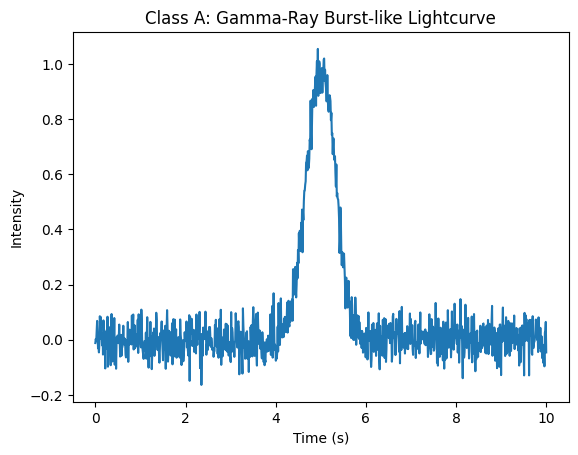

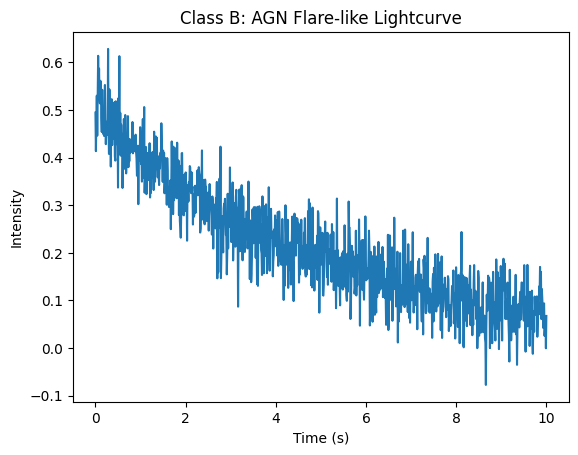

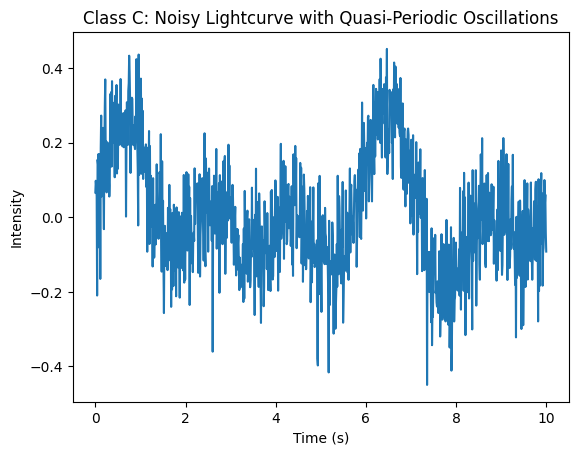

In [55]:
# Parameters for GRB-like lightcurve
t = np.linspace(0, 10, 1000)  # Time axis
burst_intensity = np.exp(-((t - 5)**2) / 0.2)  # Gaussian pulse
noise = np.random.normal(0, 0.05, len(t))  # Small noise

class_a = burst_intensity + noise  # Short-duration burst with noise

plt.plot(t, class_a)
plt.title("Class A: Gamma-Ray Burst-like Lightcurve")
plt.xlabel("Time (s)")
plt.ylabel("Intensity")
plt.show()

# Parameters for AGN flare-like lightcurve
flare_intensity = 0.5 * np.exp(-t / 5)  # Slow decay (longer duration)
noise = np.random.normal(0, 0.05, len(t))  # Small noise

class_b = flare_intensity + noise  # Long-duration, low-intensity flare

plt.plot(t, class_b)
plt.title("Class B: AGN Flare-like Lightcurve")
plt.xlabel("Time (s)")
plt.ylabel("Intensity")
plt.show()


# Parameters for noisy oscillating lightcurve
frequencies = np.linspace(0.2, 0.5, 3)  # Three oscillations with different frequencies
oscillation = 0.1*np.sum([np.sin(2 * np.pi * f * t) for f in frequencies], axis=0)  # Sum of oscillations
noise = np.random.normal(0, 0.1, len(t))  # Noise to simulate irregularities

class_c = oscillation + noise  # Noisy, quasi-periodic oscillation

plt.plot(t, class_c)
plt.title("Class C: Noisy Lightcurve with Quasi-Periodic Oscillations")
plt.xlabel("Time (s)")
plt.ylabel("Intensity")
plt.show()


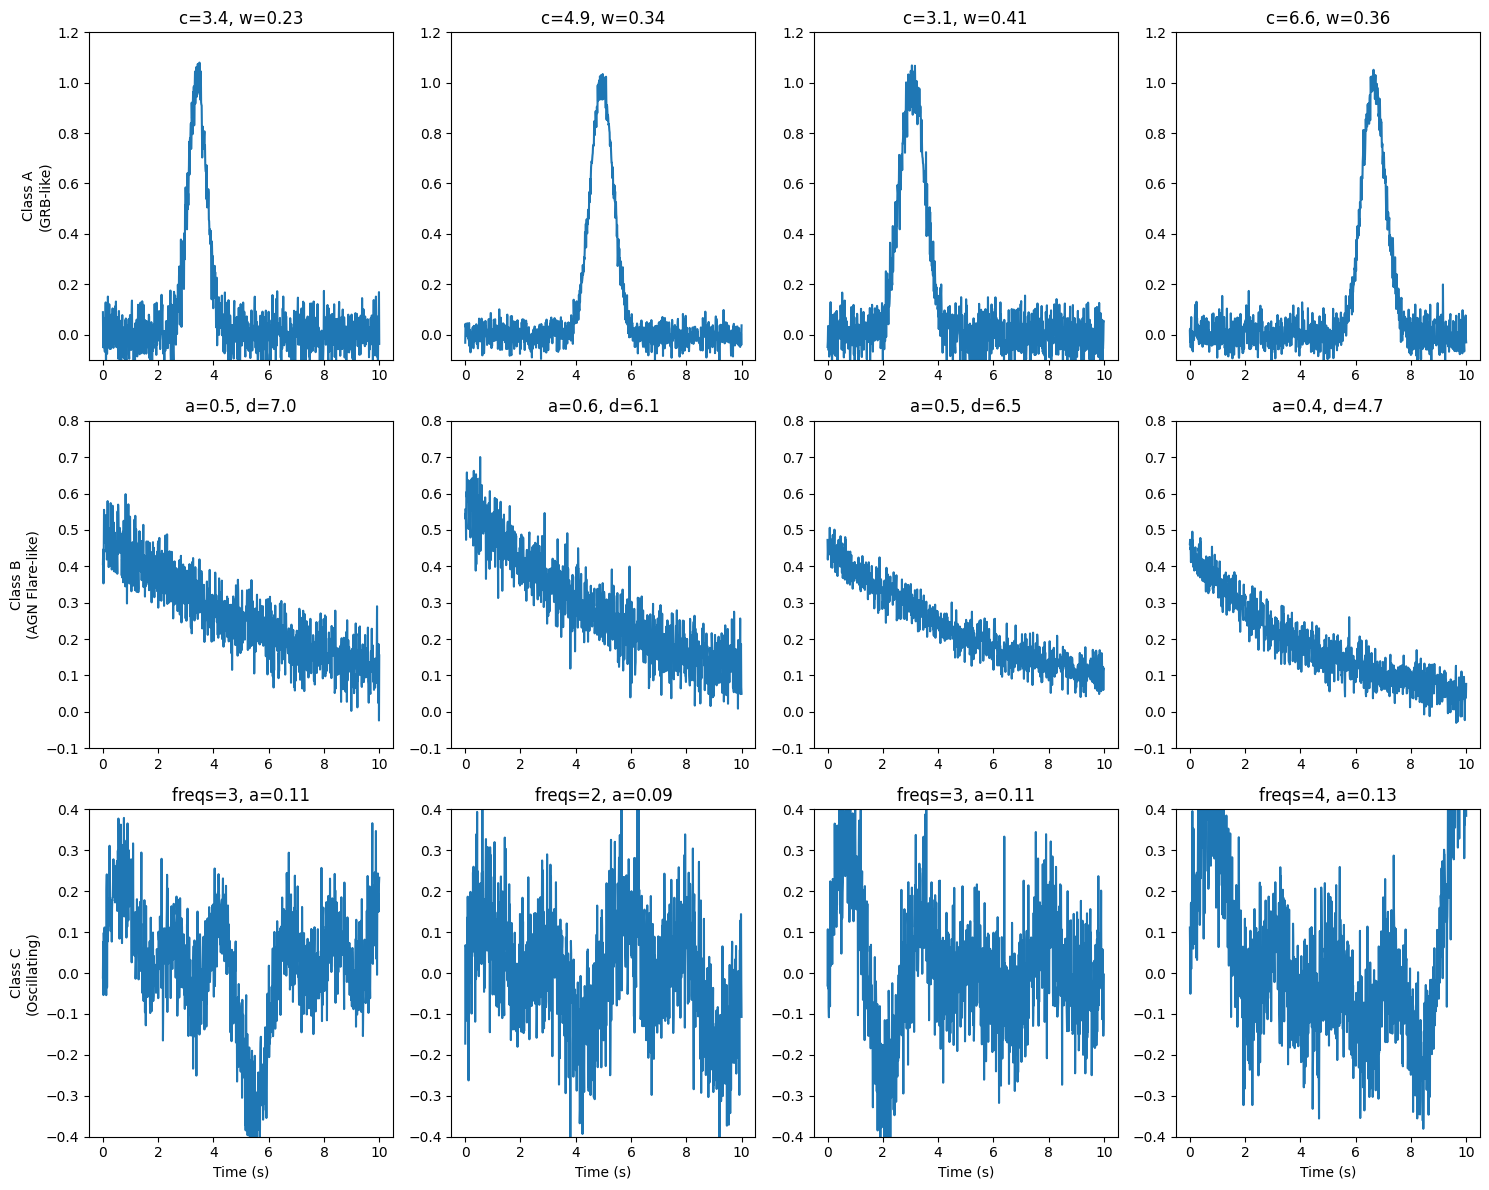

Generated dataset with 300 samples:
class
Class A    100
Class B    100
Class C    100
Name: count, dtype: int64


In [59]:
# Generate random lightcurves with different parameters for each class
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Define functions to generate each class of lightcurves with random parameters
def generate_class_a(n_samples=10):
    """Generate Gamma-Ray Burst-like lightcurves with randomized parameters"""
    samples = []
    params = []
    
    for _ in range(n_samples):
        # Randomize parameters
        center = np.random.uniform(3, 7)  # Burst center position
        width = np.random.uniform(0.1, 0.5)  # Burst width
        noise_level = np.random.uniform(0.03, 0.08)  # Noise level
        
        # Generate lightcurve
        burst = np.exp(-((t - center)**2) / width)
        noise = np.random.normal(0, noise_level, len(t))
        lightcurve = burst + noise
        
        samples.append(lightcurve)
        params.append({'center': center, 'width': width, 'noise_level': noise_level})
    
    return samples, params

def generate_class_b(n_samples=10):
    """Generate AGN Flare-like lightcurves with randomized parameters"""
    samples = []
    params = []
    
    for _ in range(n_samples):
        # Randomize parameters
        amplitude = np.random.uniform(0.3, 0.7)  # Flare amplitude
        decay = np.random.uniform(3, 8)  # Decay timescale
        noise_level = np.random.uniform(0.03, 0.08)  # Noise level
        
        # Generate lightcurve
        flare = amplitude * np.exp(-t / decay)
        noise = np.random.normal(0, noise_level, len(t))
        lightcurve = flare + noise
        
        samples.append(lightcurve)
        params.append({'amplitude': amplitude, 'decay': decay, 'noise_level': noise_level})
    
    return samples, params

def generate_class_c(n_samples=10):
    """Generate Oscillating lightcurves with randomized parameters"""
    samples = []
    params = []
    
    for _ in range(n_samples):
        # Randomize parameters
        n_freqs = np.random.randint(2, 5)  # Number of component frequencies
        min_freq = np.random.uniform(0.1, 0.3)  # Min frequency
        max_freq = np.random.uniform(0.4, 0.7)  # Max frequency
        amplitude = np.random.uniform(0.08, 0.15)  # Oscillation amplitude
        noise_level = np.random.uniform(0.07, 0.12)  # Noise level
        
        # Generate lightcurve
        freqs = np.linspace(min_freq, max_freq, n_freqs)
        oscillation = amplitude * np.sum([np.sin(2 * np.pi * f * t) for f in freqs], axis=0)
        noise = np.random.normal(0, noise_level, len(t))
        lightcurve = oscillation + noise
        
        samples.append(lightcurve)
        params.append({'n_freqs': n_freqs, 'min_freq': min_freq, 'max_freq': max_freq, 
                       'amplitude': amplitude, 'noise_level': noise_level})
    
    return samples, params

# Generate 10 samples of each class
n_samples = 100
class_a_samples, class_a_params = generate_class_a(n_samples)
class_b_samples, class_b_params = generate_class_b(n_samples)
class_c_samples, class_c_params = generate_class_c(n_samples)

# Plot a subset of samples for each class
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 4, figure=fig)

# Plot Class A samples
for i in range(4):
    ax = fig.add_subplot(gs[0, i])
    ax.plot(t, class_a_samples[i])
    if i == 0:
        ax.set_ylabel("Class A\n(GRB-like)")
    ax.set_title(f"c={class_a_params[i]['center']:.1f}, w={class_a_params[i]['width']:.2f}")
    ax.set_ylim(-0.1, 1.2)
    
# Plot Class B samples
for i in range(4):
    ax = fig.add_subplot(gs[1, i])
    ax.plot(t, class_b_samples[i])
    if i == 0:
        ax.set_ylabel("Class B\n(AGN Flare-like)")
    ax.set_title(f"a={class_b_params[i]['amplitude']:.1f}, d={class_b_params[i]['decay']:.1f}")
    ax.set_ylim(-0.1, 0.8)
    
# Plot Class C samples
for i in range(4):
    ax = fig.add_subplot(gs[2, i])
    ax.plot(t, class_c_samples[i])
    if i == 0:
        ax.set_ylabel("Class C\n(Oscillating)")
    ax.set_title(f"freqs={class_c_params[i]['n_freqs']}, a={class_c_params[i]['amplitude']:.2f}")
    ax.set_xlabel("Time (s)")
    ax.set_ylim(-0.4, 0.4)

plt.tight_layout()
plt.show()

# Create a dataset with features from all samples
all_samples = class_a_samples + class_b_samples + class_c_samples
all_features = []
class_labels = []

# Extract features from each sample
for i, sample in enumerate(all_samples):
    if i < n_samples:
        class_label = 'Class A'
    elif i < 2*n_samples:
        class_label = 'Class B'
    else:
        class_label = 'Class C'
        
    features = ct.time_series_summary(sample)
    all_features.append(features)
    class_labels.append(class_label)

# Create a DataFrame with all features
all_features_df = pd.DataFrame(all_features)
all_features_df['class'] = class_labels

print(f"Generated dataset with {len(all_features_df)} samples:")
print(all_features_df['class'].value_counts())

In [60]:
all_features_df

,mean,median,mode,variance,standard_deviation,skewness,kurtosis,minimum,maximum,range,q05,q25,q75,q95,sum,absolute_energy,class
0,0.086873,0.021329,0.042312,0.056288,0.237251,2.585912,9.231607,-0.201090,1.079853,1.280943,-0.096049,-0.031876,0.079086,0.768546,86.872750,63.834965,Class A
1,0.100850,0.010981,0.107280,0.063831,0.252647,2.439804,7.835348,-0.107344,1.034410,1.141754,-0.056648,-0.017836,0.050097,0.832847,100.849840,74.001283,Class A
2,0.112782,0.022337,-0.062249,0.072318,0.268921,2.109079,6.509705,-0.256986,1.068633,1.325619,-0.098311,-0.030311,0.098665,0.872939,112.781784,85.038146,Class A
3,0.106853,0.015539,0.064472,0.064987,0.254925,2.334392,7.400740,-0.140057,1.051298,1.191355,-0.066741,-0.019775,0.071516,0.835626,106.853235,76.404623,Class A
4,0.111485,0.019354,0.769504,0.072280,0.268850,2.174503,6.851488,-0.199573,1.181461,1.381035,-0.096257,-0.031723,0.102101,0.848314,111.484978,84.709365,Class A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.002159,-0.005943,-0.121861,0.027234,0.165028,0.021960,3.202984,-0.554220,0.568801,1.123020,-0.273385,-0.110709,0.112712,0.269056,-2.158891,27.238744,Class C
296,0.034571,0.024063,0.081179,0.029835,0.172728,0.105760,3.101203,-0.461804,0.495336,0.957140,-0.262075,-0.070035,0.141220,0.343756,34.571479,31.030019,Class C
297,0.021468,0.009937,-0.128631,0.028824,0.169776,0.578260,3.839999,-0.434514,0.603675,1.038189,-0.234962,-0.089122,0.114672,0.341295,21.467520,29.284741,Class C
298,0.006398,-0.000160,-0.101442,0.016579,0.128759,0.196790,2.958526,-0.331164,0.455886,0.787050,-0.193978,-0.083117,0.083648,0.238313,6.397857,16.619695,Class C


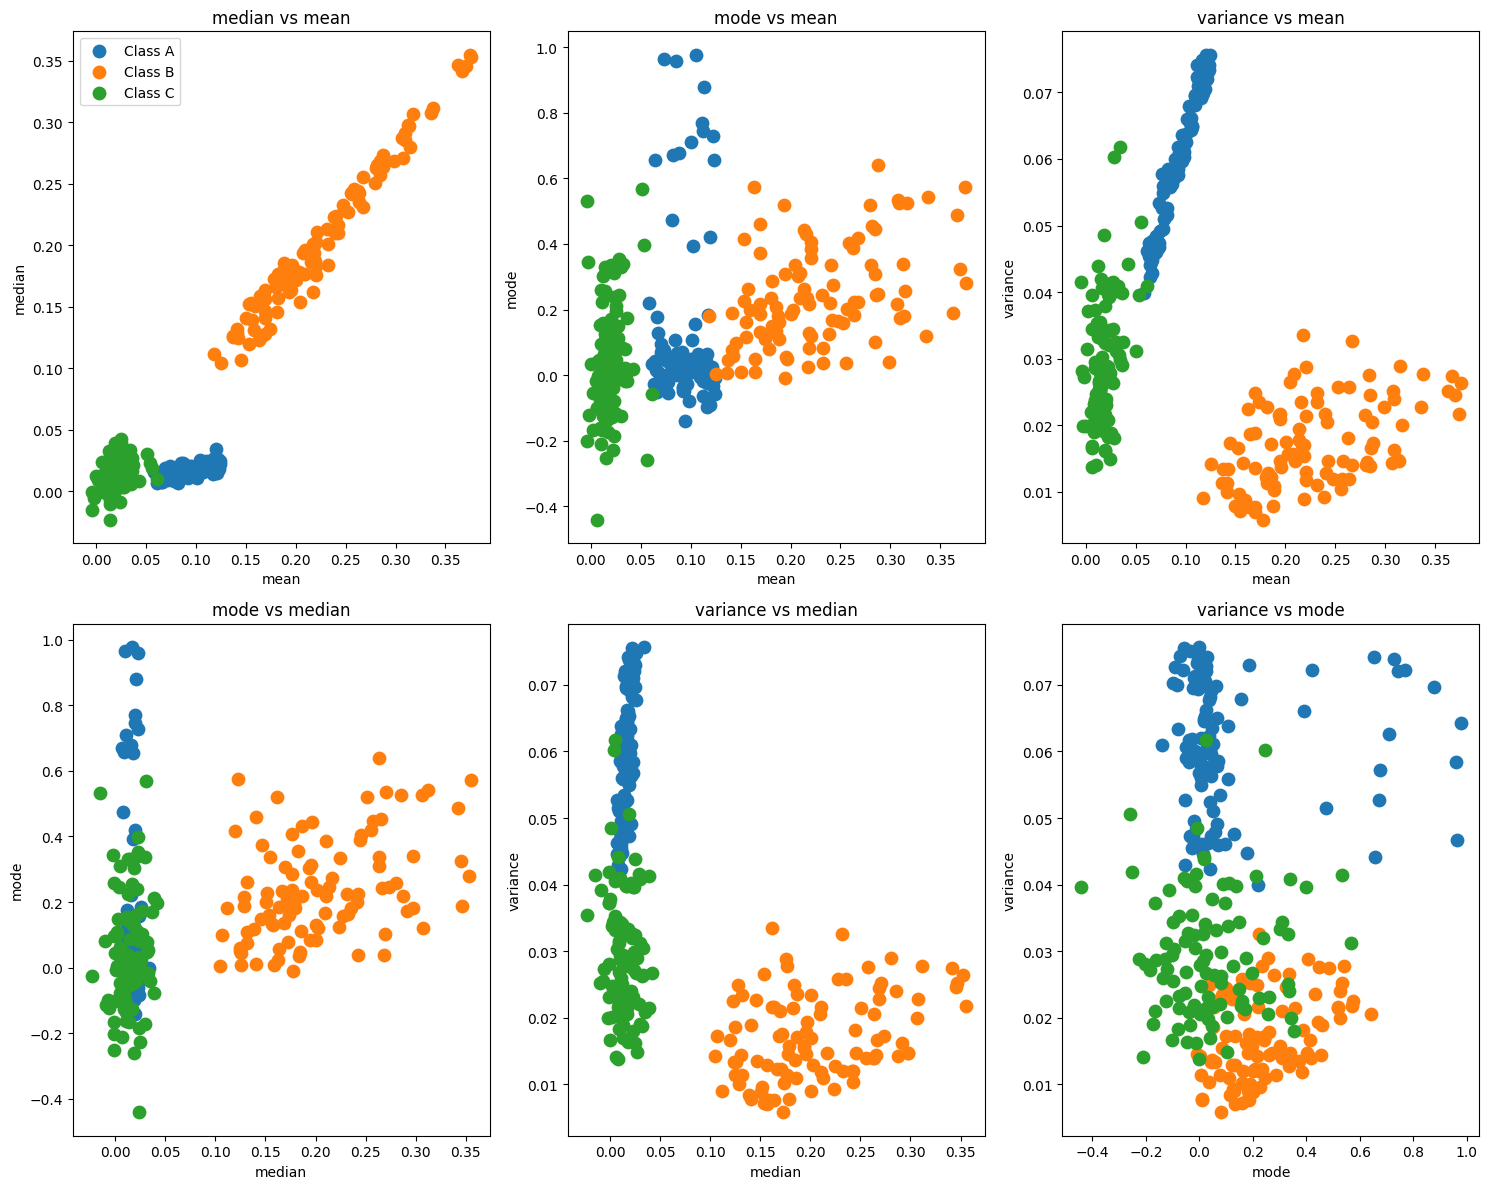

In [68]:
# Plot feature comparisons across classes
def plot_features(x_col, y_col):
    """Plot a specific feature comparison with classes colored differently"""
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    markers = ['o', 's', '^']
    
    # Group by class
    classes = all_features_df['class'].unique()
    
    for i, class_name in enumerate(classes):
        class_data = all_features_df[all_features_df['class'] == class_name]
        plt.scatter(
            class_data[x_col],
            class_data[y_col],
            color=colors[i],
            marker=markers[i],
            s=100,
            label=class_name
        )
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Create a matrix of plots for multiple feature combinations
plt.figure(figsize=(15, 12))

# Select key features to compare (adjust based on your actual feature names)
features = list(all_features_df.columns[:4])  # Using all feature columns
features = [col for col in features if col != 'class']  # Exclude class column if it's in the first 4

# Use a simple counter to track subplot position
subplot_idx = 1

# Create a grid of subplots
for i, feat1 in enumerate(features):
    for j, feat2 in enumerate(features):
        if i >= j:  # Skip diagonal and lower triangle
            continue
            
        plt.subplot(2, 3, subplot_idx)
        subplot_idx += 1
        
        for k, class_name in enumerate(all_features_df['class'].unique()):
            class_data = all_features_df[all_features_df['class'] == class_name]
            plt.scatter(
                class_data[feat1],
                class_data[feat2],
                label=class_name if subplot_idx == 2 else None,  # Only show legend on first plot
                s=80
            )
            
        plt.xlabel(feat1)
        plt.ylabel(feat2)
        plt.title(f"{feat2} vs {feat1}")
        
        if subplot_idx == 2:  # Show legend on first completed plot
            plt.legend()

plt.tight_layout()
plt.show()


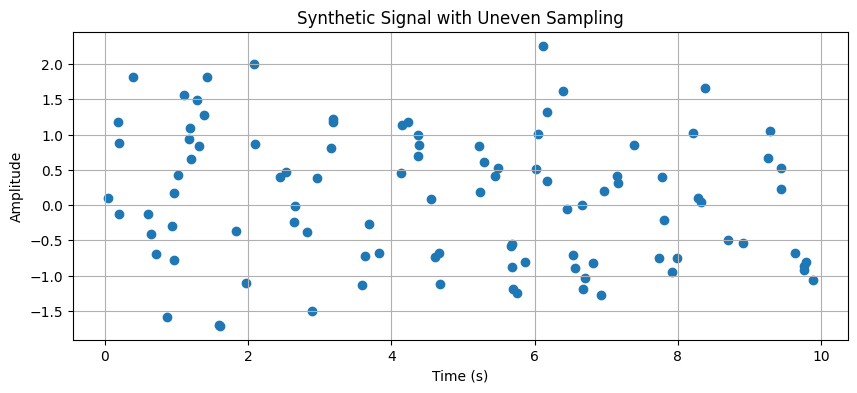

Original frequencies: 1 and 3 Hz
Peak frequency (Lomb-Scargle): 1.0 Hz


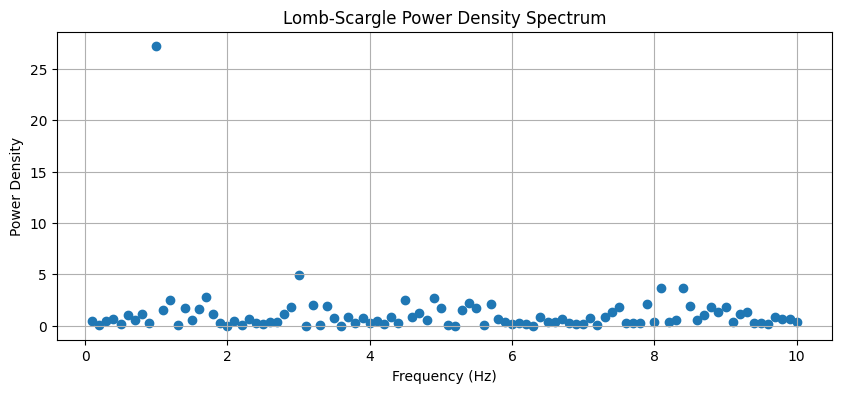

Peak frequency (FFT): 0.56760436765988 Hz


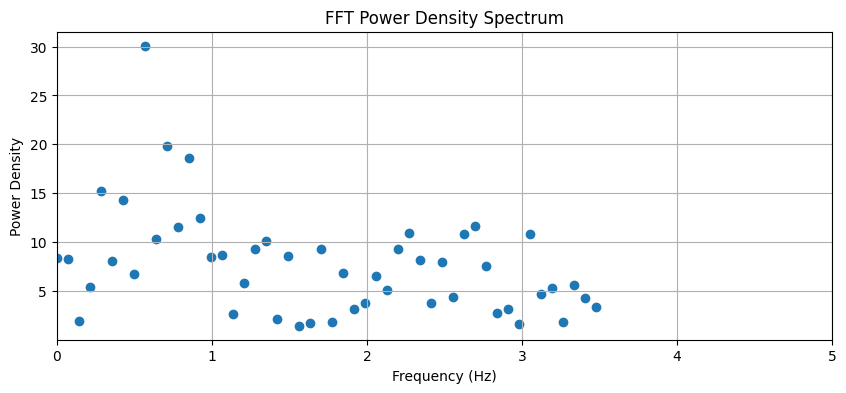

In [71]:
# generate a synthetic signal with two frequencies and uneven sampling
np.random.seed(0)
time = np.sort(np.random.rand(100) * 10)  # unevenly spaced time points
signal = np.sin(2 * np.pi * 1 * time) + 0.5 * np.sin(2 * np.pi * 3 * time) + 0.5 * np.random.normal(size=time.shape)
plt.figure(figsize=(10, 4))
plt.scatter(time, signal)
plt.title('Synthetic Signal with Uneven Sampling')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

print("Original frequencies: 1 and 3 Hz")


# Lomb-Scargle
ls_pds = ct.lomb_scargle_py(time, signal, freqs=np.linspace(0.1, 10, 100))
# Highest peak frequency
peak_freq = np.argmax(ls_pds)
print(f"Peak frequency (Lomb-Scargle): {np.linspace(0.1, 10, 100)[peak_freq]} Hz")
plt.figure(figsize=(10, 4))
plt.scatter(np.linspace(0.1, 10, 100), ls_pds)
plt.title('Lomb-Scargle Power Density Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Density')
plt.grid()
plt.show()
# FFT
# Perform FFT on unevenly sampled data
fft_pds = ct.perform_fft_py(signal)
# Taking absolute value of FFT result
fft_pds = np.abs(fft_pds)
# Highest peak frequency
peak_freq = np.argmax(fft_pds)
print(f"Peak frequency (FFT): {np.abs(np.fft.fftfreq(len(signal), d=(time[1]-time[0]))[peak_freq])} Hz")
plt.figure(figsize=(10, 4))
plt.scatter(np.fft.fftfreq(len(signal), d=(time[1]-time[0])), fft_pds)
plt.title('FFT Power Density Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Density')
plt.xlim(0, 5)  # Limit x-axis to positive frequencies
plt.grid()
plt.show()

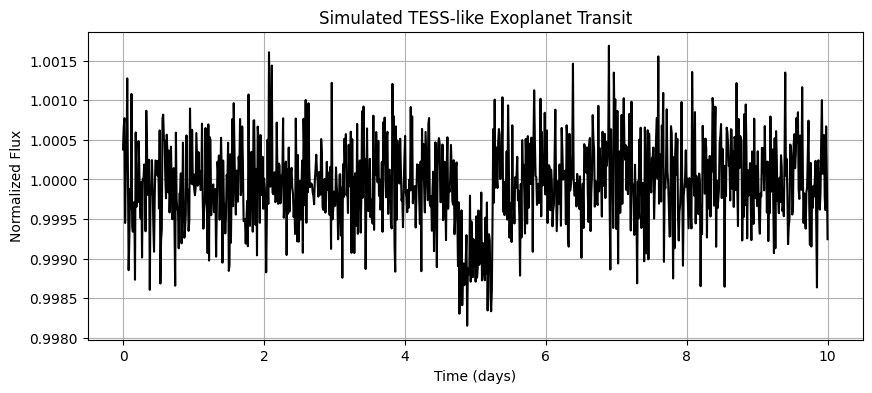

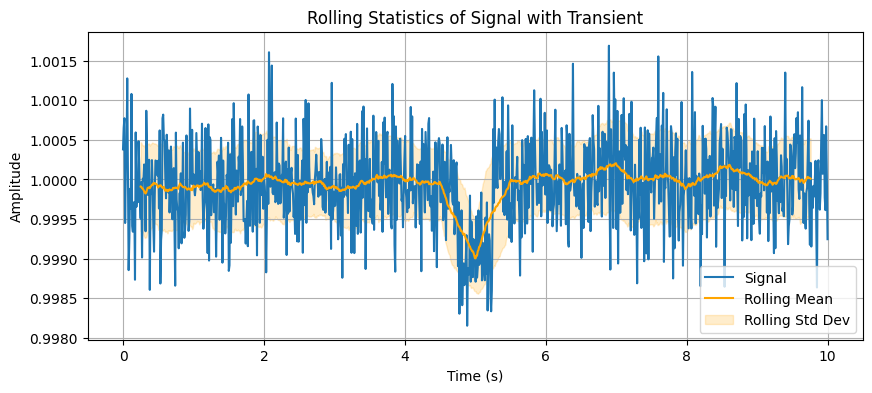

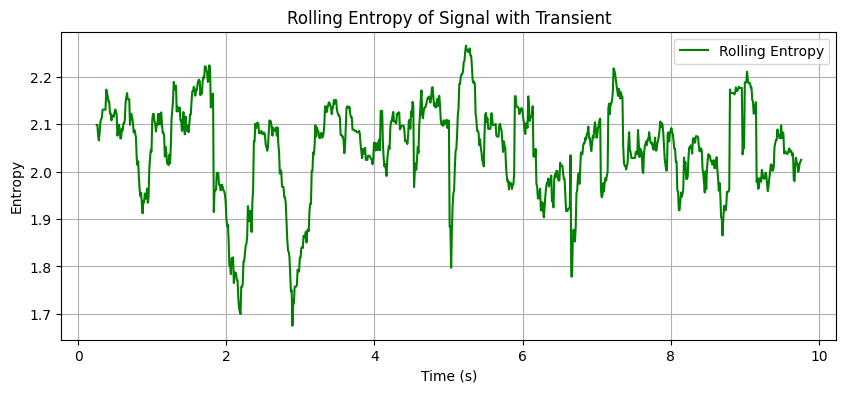

In [84]:
# Injecting a sudden transient into the signal and plotting the rolling statistics
# Create a new signal with a sudden transient
# Parameters
transit_time = 5.0            # Midpoint of the transit
transit_depth = 0.001          # Fractional decrease in brightness (~1%)
transit_duration = 0.5        # Duration of the transit
time = np.linspace(0, 10, 1000)

# Simulated stellar brightness (normalized around 1 with small noise)
signal = 1 + 0.0005 * np.random.normal(size=time.shape)

# Insert a transit: dip in brightness
in_transit = (time >= transit_time - transit_duration/2) & (time <= transit_time + transit_duration/2)
signal[in_transit] -= transit_depth

# Plot
plt.figure(figsize=(10, 4))
plt.plot(time, signal, color='black')
plt.title('Simulated TESS-like Exoplanet Transit')
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')
plt.grid(True)
plt.show()

transient_signal = signal

# Calculate rolling statistics on the transient_signal (not the previous signal)
window_size = 50
rolling_mean = ct.rolling_mean(transient_signal, window=window_size)
rolling_variance = ct.rolling_variance(transient_signal, window=window_size)
rolling_std = np.sqrt(rolling_variance)
rolling_entropy = ct.sliding_window_entropy(transient_signal, window=window_size, bins=10)

# Create a properly aligned time array for the rolling statistics
# Assuming the rolling window returns values centered at each window
time_rolled = time[window_size//2:-window_size//2+1]

plt.figure(figsize=(10, 4))
plt.plot(time, transient_signal, label='Signal')
plt.plot(time_rolled, rolling_mean, label='Rolling Mean', color='orange')
plt.fill_between(time_rolled, rolling_mean - rolling_std, rolling_mean + rolling_std, color='orange', alpha=0.2, label='Rolling Std Dev')
plt.title('Rolling Statistics of Signal with Transient')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Plot rolling entropy with properly aligned time axis
plt.figure(figsize=(10, 4))
plt.plot(time_rolled, rolling_entropy, label='Rolling Entropy', color='green')
plt.title('Rolling Entropy of Signal with Transient')
plt.xlabel('Time (s)')
plt.ylabel('Entropy')
plt.legend()
plt.grid()
plt.show()